# Distributed Computing - Project 1





## 1.Prepare Environment

### 1.1 Install Java, Pyspark and Spark NLP

In [ ]:
#!apt-get update -qq
#!apt-get install -y openjdk-8-jdk-headless -qq

In [ ]:
import os
#Install Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~20.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


In [ ]:
#Install Pyspark
#! pip install --ignore-installed pyspark==2.4.4

#Install Spark NLP
#! pip install --ignore-installed spark-nlp==2.6.2

### 1.2 Start  Spark Session

In [ ]:
import sparknlp
from sparknlp.pretrained import PretrainedPipeline
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SQLContext

import re

#spark = sparknlp.start()
spark = sparknlp.start(spark32=True)

sqlContext = SQLContext(spark)

22/04/13 15:10:05 WARN Utils: Your hostname, DSGPU05 resolves to a loopback address: 127.0.1.1; using 10.10.11.64 instead (on interface eno1)
22/04/13 15:10:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/opt/spark-3.2.1-bin-hadoop3.2/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/mmillan/.ivy2/cache
The jars for the packages stored in: /home/mmillan/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp-spark32_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-f564b308-7cab-48c4-95c6-00fc52e17739;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp-spark32_2.12;3.4.2 in central
	found com.typesafe#config;1.4.1 in central
	found org.rocksdb#rocksdbjni;6.5.3 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.603 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.code.findbugs#annotations;3.0.1 in central
	found net.jcip#jcip-annotations;1.0 in central
	found com.google.code.findbugs#jsr305;3.0.1 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.

## 2.Get Classics Corpus

### 2.1 Convert txt files into Python Dataframe

In [ ]:
import pandas as pd
import os
import re

In [ ]:
#directory ="/content/drive/MyDrive/Distributed-Computing/data/classic_literature/" #Change according to path
directory ="data/classic_literature/" #Change according to path
text_type = 'C'

classics_df = pd.DataFrame(columns=['id', 'type', 'text'])

for filename in os.listdir(directory):
#filename = "data/classic_literature/45.txt"
    file_ext = os.path.basename(filename).rsplit('.',1)[1] #Get file extension
    if file_ext == "txt":
        with open(directory + '/' + filename, 'r') as file:
            text_id = os.path.basename(filename).rsplit('.',1)[0]
            corpus = file.read()
            corpus = re.sub(';', ' ', corpus)
            corpus = corpus.replace('Chapter', '')
            classics_df.loc[len(classics_df.index)] = [text_id, text_type, corpus]

In [ ]:
classics_df

,id,type,text
0,1905,C,"\n\n\n\n\nTHE GOVERNESS \n\nOR, THE LITTLE FEM..."
1,768,C,\n\n\n\nTranscribed from the 1910 John Murray ...
2,1342,C,\n\n\n\n\nPRIDE AND PREJUDICE\n\nBy Jane Auste...
3,1260,C,\n\n\n\n\nTranscribed from the 1897 Service & ...
4,514,C,\n\n\n\nLITTLE WOMEN\n\n\nby\n\nLouisa May Alc...
5,113,C,\n\n\n\n\n\n\n\n\n\n\nIn Honor of Lisa Hart's ...
6,145,C,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMiddlemarch\n\n\...
7,45,C,\n\n\n\n\n ANNE OF GREEN GABL...


### 2.2 Convert Python Dataframe into Spark Dataframe

In [ ]:
df_Spark_classics = sqlContext.createDataFrame(classics_df) #Pyspark SQL dataframe

In [ ]:
#df_Spark_classics.show()

## 3.Get Fanfictions Corpus

### 3.1 Convert txt files into Python Dataframe

In [ ]:
#directory ="/content/drive/MyDrive/Distributed-Computing/data/fanfiction/" #Change according to path
directory ="data/fanfiction/" #Change according to path
text_type = 'F'

fanfictions_df = pd.DataFrame(columns=['id', 'type', 'text'])

for filename in os.listdir(directory):
    file_ext = os.path.basename(filename).rsplit('.',1)[1] #Get file extension
    if file_ext == "txt":
        with open(directory + '/' + filename, 'r') as file:
            text_id = os.path.basename(filename).rsplit('.',1)[0]
            corpus = file.read()
            corpus = corpus.replace('Chapter', '')
            corpus = re.sub(';', ' ', corpus)
            fanfictions_df.loc[len(fanfictions_df.index)] = [text_id, text_type, corpus]

In [ ]:
fanfictions_df

,id,type,text
0,fanfic_1536152,F,"1\nGoing back was the worst.I had hoped that,..."
1,fanfic_7441657,F,"1\nPrologue\nOctober 31, 1981\nThe view out t..."
2,fanfic_25042705,F,"1\n“But, really,” said Mrs. Bennet rather lou..."
3,fanfic_35367502,F,1\n“Lily there’s a boy at the door!”\nThe gin...
4,fanfic_36819574,F,"1\nI was born in sunlight, and dragged into d..."
5,fanfic_24025603,F,"1\nDisclaimer: I, by no means, claim to own a..."
6,fanfic_33183868,F,1\n \n\n \n\nThere was something luminescent ...
7,fanfic_8523001,F,1\nThere was such a cultural veil of secrecy ...
8,fanfic_23824330,F,1\nAmy sits facing the window of her room. He...


### 3.2 Convert Python Dataframe into Spark Dataframe

In [ ]:
df_Spark_fanfictions = sqlContext.createDataFrame(fanfictions_df) #Pyspark SQL dataframe

------------------------------------------------------------------------------------------------------------

## 5 Sentiment Analysis

In this section we are retrieving the overall sentiment of each boook.

For so, five different pipelines are being used, where each of them uses a different pre-trained model to identify sentiment.
The combination of the three results will be used as final output to determine whether positive/negative sentiments predominates in classics or fanfictions.

### 5.1 Define Sentiment Analysis Spark NLP pipelines

In [ ]:
document = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document") \
    .setCleanupMode("shrink_full") #remove new lines and tabs, plus shrinking spaces and blank lines.

token = Tokenizer()\
    .setInputCols(['document'])\
    .setOutputCol('token')

normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized") \
    .setLowercase(True) \
    .setCleanupPatterns(["""[^A-Za-z]"""]) # remove punctuations and alphanumeric chars

use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")

document_classifier = ClassifierDLModel.pretrained('classifierdl_use_emotion') \
  .setInputCols(["document", "sentence_embeddings"]) \
 .setOutputCol("sentiment")

sentiment1 = SentimentDLModel.pretrained("sentimentdl_use_twitter")\
 .setInputCols(["sentence_embeddings"])\
 .setOutputCol("sentiment")

sentiment2 = SentimentDLModel.pretrained("sentimentdl_use_imdb")\
 .setInputCols(["sentence_embeddings"])\
 .setOutputCol("sentiment")

sequenceClassifier1 = BertForSequenceClassification \
      .pretrained('bert_sequence_classifier_emotion', 'en') \
      .setInputCols(['normalized', 'document']) \
      .setOutputCol('sentiment')

#sequenceClassifier2 = DistilBertForSequenceClassification \
#      .pretrained('distilbert_sequence_classifier_emotion', 'en') \
#      .setInputCols(['normalized', 'document']) \
#      .setOutputCol('sentiment')

finisher = Finisher() \
    .setInputCols(["sentiment"]) \
    .setOutputCols("final_sentiment")\
    .setOutputAsArray(True) \
    .setCleanAnnotations(False)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ | ]tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
Download done! Loading the resource.
[ | ]

2022-04-13 15:10:32.220455: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[ / ]

2022-04-13 15:10:32.589695: I external/org_tensorflow/tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz


[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[ | ]classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[ / ]Download done! Loading the resource.
[OK!]
sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
[ | ]sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
[ / ]Download done! Loading the resource.
[OK!]
sentimentdl_use_imdb download started this may take some time.
Approximate size to download 12 MB
[ | ]sentimentdl_use_imdb download started this may take some time.
Approximate size to download 12 MB
Download done! Loading the resource.
[OK!]
bert_sequence_classifier_emotion download started this may take some time.
Approximate size to download 391.1 MB
[ | ]bert_sequence_classifier_emotion download started this may take some time.
Approximate size to download 391.1 MB

<b>Pipeline 1</b>

Pre-trained model: classifierdl_use_emotion from John Snow Labs (https://nlp.johnsnowlabs.com/2021/01/09/classifierdl_use_emotion_en.html)

In [ ]:
nlpPipeline_sentiment1 = Pipeline(
      stages = [document,
                use,
                document_classifier,
                finisher])

<b>Pipeline 2</b>

Pre-trained model: sentimentdl_use_twitter from John Snow Labs (https://nlp.johnsnowlabs.com/2021/01/18/analyze_sentimentdl_use_twitter_en.html)

In [ ]:
nlpPipeline_sentiment2 = Pipeline(
      stages = [document,
                use,
                sentiment1,
                finisher])

<b>Pipeline 3</b>

Pre-trained model: sentimentdl_use_imdb from John Snow Labs (https://nlp.johnsnowlabs.com/2021/01/15/analyze_sentimentdl_use_imdb_en.html)

In [ ]:
nlpPipeline_sentiment3 = Pipeline(
      stages = [document,
                use,
                sentiment2,
                finisher])

<b>Pipeline 4</b>

Pre-trained model: bert_sequence_classifier_emotion from John Snow Labs (https://nlp.johnsnowlabs.com/2022/01/14/bert_sequence_classifier_emotion_en.html)

In [ ]:
nlpPipeline_sentiment4 = Pipeline(
      stages = [document,  
                token,
                normalizer,
                sequenceClassifier1, 
                finisher])

 ### 5.2 Run the pipelines on Classics

#### Sentiment Pipeline 1

In [ ]:
sentiment_classics1 = nlpPipeline_sentiment1.fit(df_Spark_classics).transform(df_Spark_classics)
sentiment_classics1_df = sentiment_classics1.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                            .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")
sentiment_classics1_df.show(20, truncate=100)

22/04/13 15:11:56 WARN TaskSetManager: Stage 16 contains a task of very large size (1015 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:11:57 WARN TaskSetManager: Stage 17 contains a task of very large size (1765 KiB). The maximum recommended task size is 1000 KiB.


+----------------------------------------------------------------------------------------------------+---------+
|                                                                                              corpus|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|THE GOVERNESS OR, THE LITTLE FEMALE ACADEMY (1749) by Sarah Fielding There lived in the northern ...|      joy|
|Transcribed from the 1910 John Murray edition by David Price, email ccx074@pglaf.org WUTHERING HE...|      joy|
|PRIDE AND PREJUDICE By Jane Austen 1 It is a truth universally acknowledged, that a single man in...|      joy|
|Transcribed from the 1897 Service & Paton edition by David Price, email ccx074@pglaf.org JANE EYR...|      joy|
|LITTLE WOMEN by Louisa May Alcott CONTENTS PART 1 ONE PLAYING PILGRIMS TWO A MERRY CHRISTMAS THRE...|      joy|
|In Honor of Lisa Hart's 9th Birthday THE SECRET GARDEN BY FRANCES HODGSON BURNETT Author of "Th

#### Sentiment Pipeline 2

In [ ]:
sentiment_classics2 = nlpPipeline_sentiment2.fit(df_Spark_classics).transform(df_Spark_classics)
sentiment_classics2_df = sentiment_classics2.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                            .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")
sentiment_classics2_df.show(20, truncate=100)

22/04/13 15:12:02 WARN TaskSetManager: Stage 20 contains a task of very large size (1015 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:12:03 WARN TaskSetManager: Stage 21 contains a task of very large size (1765 KiB). The maximum recommended task size is 1000 KiB.


+----------------------------------------------------------------------------------------------------+---------+
|                                                                                              corpus|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|THE GOVERNESS OR, THE LITTLE FEMALE ACADEMY (1749) by Sarah Fielding There lived in the northern ...| positive|
|Transcribed from the 1910 John Murray edition by David Price, email ccx074@pglaf.org WUTHERING HE...|  neutral|
|PRIDE AND PREJUDICE By Jane Austen 1 It is a truth universally acknowledged, that a single man in...| positive|
|Transcribed from the 1897 Service & Paton edition by David Price, email ccx074@pglaf.org JANE EYR...|  neutral|
|LITTLE WOMEN by Louisa May Alcott CONTENTS PART 1 ONE PLAYING PILGRIMS TWO A MERRY CHRISTMAS THRE...| negative|
|In Honor of Lisa Hart's 9th Birthday THE SECRET GARDEN BY FRANCES HODGSON BURNETT Author of "Th

#### Sentiment Pipeline 3

In [ ]:
sentiment_classics3 = nlpPipeline_sentiment3.fit(df_Spark_classics).transform(df_Spark_classics)
sentiment_classics3_df = sentiment_classics3.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                            .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")
sentiment_classics3_df.show(20, truncate=100)

22/04/13 15:12:08 WARN TaskSetManager: Stage 24 contains a task of very large size (1015 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:12:09 WARN TaskSetManager: Stage 25 contains a task of very large size (1765 KiB). The maximum recommended task size is 1000 KiB.


+----------------------------------------------------------------------------------------------------+---------+
|                                                                                              corpus|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|THE GOVERNESS OR, THE LITTLE FEMALE ACADEMY (1749) by Sarah Fielding There lived in the northern ...|      pos|
|Transcribed from the 1910 John Murray edition by David Price, email ccx074@pglaf.org WUTHERING HE...|      pos|
|PRIDE AND PREJUDICE By Jane Austen 1 It is a truth universally acknowledged, that a single man in...|      pos|
|Transcribed from the 1897 Service & Paton edition by David Price, email ccx074@pglaf.org JANE EYR...|      pos|
|LITTLE WOMEN by Louisa May Alcott CONTENTS PART 1 ONE PLAYING PILGRIMS TWO A MERRY CHRISTMAS THRE...|      pos|
|In Honor of Lisa Hart's 9th Birthday THE SECRET GARDEN BY FRANCES HODGSON BURNETT Author of "Th

#### Sentiment Pipeline 4

In [ ]:
sentiment_classics4 = nlpPipeline_sentiment4.fit(df_Spark_classics).transform(df_Spark_classics)
sentiment_classics4_df = sentiment_classics4.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                            .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")
sentiment_classics4_df.show(20, truncate=100)

22/04/13 15:12:31 WARN TaskSetManager: Stage 28 contains a task of very large size (1015 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:12:38 WARN TaskSetManager: Stage 29 contains a task of very large size (1765 KiB). The maximum recommended task size is 1000 KiB.


+----------------------------------------------------------------------------------------------------+---------+
|                                                                                              corpus|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|THE GOVERNESS OR, THE LITTLE FEMALE ACADEMY (1749) by Sarah Fielding There lived in the northern ...|     love|
|Transcribed from the 1910 John Murray edition by David Price, email ccx074@pglaf.org WUTHERING HE...|  sadness|
|PRIDE AND PREJUDICE By Jane Austen 1 It is a truth universally acknowledged, that a single man in...|      joy|
|Transcribed from the 1897 Service & Paton edition by David Price, email ccx074@pglaf.org JANE EYR...|      joy|
|LITTLE WOMEN by Louisa May Alcott CONTENTS PART 1 ONE PLAYING PILGRIMS TWO A MERRY CHRISTMAS THRE...|      joy|
|In Honor of Lisa Hart's 9th Birthday THE SECRET GARDEN BY FRANCES HODGSON BURNETT Author of "Th

#### Classics Sentiment Evaluation

In [ ]:
#sentiment_classics5_df = sentiment_classics5.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
#    .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")

In [ ]:
#sentiment_classics5_df.show(20, truncate=100)

In [ ]:
#Get distinct sentiments
#sentiment_classics5_df.select("sentiment").distinct().count()

In [ ]:
#Sentiment counts
#sentiment_classics5_df.groupBy("sentiment").count().show()

In [ ]:
#type(sentiment_classics5_df)

In [ ]:
sentiment_classics1_pd_df = sentiment_classics1_df.toPandas()
sentiment_classics2_pd_df = sentiment_classics2_df.toPandas()
sentiment_classics3_pd_df = sentiment_classics3_df.toPandas()
sentiment_classics4_pd_df = sentiment_classics4_df.toPandas()

22/04/13 15:12:52 WARN TaskSetManager: Stage 30 contains a task of very large size (1015 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:12:54 WARN TaskSetManager: Stage 31 contains a task of very large size (1015 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:12:56 WARN TaskSetManager: Stage 32 contains a task of very large size (1015 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:12:57 WARN TaskSetManager: Stage 33 contains a task of very large size (1015 KiB). The maximum recommended task size is 1000 KiB.


In [ ]:
classics_sentiment_pd_df = pd.concat([sentiment_classics1_pd_df, sentiment_classics2_pd_df, 
                                      sentiment_classics3_pd_df, sentiment_classics4_pd_df])

In [ ]:
#Group positive-pos and negative-neg into positive and negative categories
classics_sentiment_pd_df = classics_sentiment_pd_df.replace(['pos'],'positive')
classics_sentiment_pd_df = classics_sentiment_pd_df.replace(['neg'],'negative')

In [ ]:
#Add type column with Classic tag
classics_sentiment_pd_df["type"] = "classic"

In [ ]:
classics_sentiment_pd_df.head()

,corpus,sentiment,type
0,"THE GOVERNESS OR, THE LITTLE FEMALE ACADEMY (1...",joy,classic
1,Transcribed from the 1910 John Murray edition ...,joy,classic
2,PRIDE AND PREJUDICE By Jane Austen 1 It is a t...,joy,classic
3,Transcribed from the 1897 Service & Paton edit...,joy,classic
4,LITTLE WOMEN by Louisa May Alcott CONTENTS PAR...,joy,classic


<AxesSubplot:>

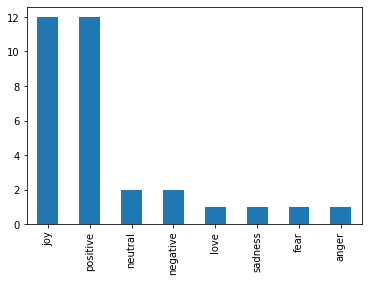

In [ ]:
classics_sentiment_pd_df['sentiment'].value_counts().plot.bar()

 ### 5.3 Run the pipelines on Fanfictions

#### Sentiment Pipeline 1

In [ ]:
sentiment_fanfictions1 = nlpPipeline_sentiment1.fit(df_Spark_fanfictions).transform(df_Spark_fanfictions)
sentiment_fanfictions1_df = sentiment_fanfictions1.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                        .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")
sentiment_fanfictions1_df.show(20, truncate=100)

22/04/13 15:13:31 WARN TaskSetManager: Stage 36 contains a task of very large size (1495 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:13:32 WARN TaskSetManager: Stage 37 contains a task of very large size (1290 KiB). The maximum recommended task size is 1000 KiB.


+----------------------------------------------------------------------------------------------------+---------+
|                                                                                              corpus|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|1 Going back was the worst.I had hoped that, after a case like mine, I’d be moved to another scho...|     fear|
|1 Prologue October 31, 1981 The view out the window was dark. The new moon had come a few days be...| surprise|
|1 “But, really,” said Mrs. Bennet rather loudly, placing her teacup back into the saucer with a l...|      joy|
|1 “Lily there’s a boy at the door!” The ginger haired girl quickly looks over her shoulder at her...| surprise|
|1 I was born in sunlight, and dragged into darkness. A child, pure before becoming cursed.I watch...|     fear|
|1 Disclaimer: I, by no means, claim to own anything remotely related to the Glee or Pitch Perfe

#### Sentiment Pipeline 2

In [ ]:
sentiment_fanfictions2 = nlpPipeline_sentiment2.fit(df_Spark_fanfictions).transform(df_Spark_fanfictions)
sentiment_fanfictions2_df = sentiment_fanfictions2.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                        .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")
sentiment_fanfictions2_df.show(20, truncate=100)

22/04/13 15:13:36 WARN TaskSetManager: Stage 40 contains a task of very large size (1495 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:13:38 WARN TaskSetManager: Stage 41 contains a task of very large size (1290 KiB). The maximum recommended task size is 1000 KiB.


+----------------------------------------------------------------------------------------------------+---------+
|                                                                                              corpus|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|1 Going back was the worst.I had hoped that, after a case like mine, I’d be moved to another scho...| positive|
|1 Prologue October 31, 1981 The view out the window was dark. The new moon had come a few days be...| positive|
|1 “But, really,” said Mrs. Bennet rather loudly, placing her teacup back into the saucer with a l...| negative|
|1 “Lily there’s a boy at the door!” The ginger haired girl quickly looks over her shoulder at her...| positive|
|1 I was born in sunlight, and dragged into darkness. A child, pure before becoming cursed.I watch...|  neutral|
|1 Disclaimer: I, by no means, claim to own anything remotely related to the Glee or Pitch Perfe

#### Sentiment Pipeline 3

In [ ]:
sentiment_fanfictions3 = nlpPipeline_sentiment3.fit(df_Spark_fanfictions).transform(df_Spark_fanfictions)
sentiment_fanfictions3_df = sentiment_fanfictions3.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                        .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")
sentiment_fanfictions3_df.show(20, truncate=100)

22/04/13 15:13:42 WARN TaskSetManager: Stage 44 contains a task of very large size (1495 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:13:43 WARN TaskSetManager: Stage 45 contains a task of very large size (1290 KiB). The maximum recommended task size is 1000 KiB.


+----------------------------------------------------------------------------------------------------+---------+
|                                                                                              corpus|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|1 Going back was the worst.I had hoped that, after a case like mine, I’d be moved to another scho...|      neg|
|1 Prologue October 31, 1981 The view out the window was dark. The new moon had come a few days be...|      neg|
|1 “But, really,” said Mrs. Bennet rather loudly, placing her teacup back into the saucer with a l...|      pos|
|1 “Lily there’s a boy at the door!” The ginger haired girl quickly looks over her shoulder at her...|      neg|
|1 I was born in sunlight, and dragged into darkness. A child, pure before becoming cursed.I watch...|      neg|
|1 Disclaimer: I, by no means, claim to own anything remotely related to the Glee or Pitch Perfe

#### Sentiment Pipeline 4

In [ ]:
sentiment_fanfictions4 = nlpPipeline_sentiment4.fit(df_Spark_fanfictions).transform(df_Spark_fanfictions)
sentiment_fanfictions4_df = sentiment_fanfictions4.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                        .selectExpr("out.document.result as corpus", "out.sentiment.result as sentiment")
sentiment_fanfictions4_df.show(20, truncate=100)

22/04/13 15:13:52 WARN TaskSetManager: Stage 48 contains a task of very large size (1495 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:14:03 WARN TaskSetManager: Stage 49 contains a task of very large size (1290 KiB). The maximum recommended task size is 1000 KiB.


+----------------------------------------------------------------------------------------------------+---------+
|                                                                                              corpus|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|1 Going back was the worst.I had hoped that, after a case like mine, I’d be moved to another scho...|    anger|
|1 Prologue October 31, 1981 The view out the window was dark. The new moon had come a few days be...|      joy|
|1 “But, really,” said Mrs. Bennet rather loudly, placing her teacup back into the saucer with a l...|      joy|
|1 “Lily there’s a boy at the door!” The ginger haired girl quickly looks over her shoulder at her...|  sadness|
|1 I was born in sunlight, and dragged into darkness. A child, pure before becoming cursed.I watch...|     love|
|1 Disclaimer: I, by no means, claim to own anything remotely related to the Glee or Pitch Perfe

#### Fanfictions Sentiment Evaluation

In [ ]:
sentiment_fanfictions1_pd_df = sentiment_fanfictions1_df.toPandas()
sentiment_fanfictions2_pd_df = sentiment_fanfictions2_df.toPandas()
sentiment_fanfictions3_pd_df = sentiment_fanfictions3_df.toPandas()
sentiment_fanfictions4_pd_df = sentiment_fanfictions4_df.toPandas()

22/04/13 15:14:14 WARN TaskSetManager: Stage 50 contains a task of very large size (1495 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:14:16 WARN TaskSetManager: Stage 51 contains a task of very large size (1495 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:14:18 WARN TaskSetManager: Stage 52 contains a task of very large size (1495 KiB). The maximum recommended task size is 1000 KiB.
22/04/13 15:14:20 WARN TaskSetManager: Stage 53 contains a task of very large size (1495 KiB). The maximum recommended task size is 1000 KiB.


In [ ]:
fanfictions_sentiment_pd_df = pd.concat([sentiment_fanfictions1_pd_df, sentiment_fanfictions2_pd_df, 
                                         sentiment_fanfictions3_pd_df, sentiment_fanfictions4_pd_df])

In [ ]:
#Group positive-pos and negative-neg into positive and negative categories
fanfictions_sentiment_pd_df = fanfictions_sentiment_pd_df.replace(['pos'],'positive')
fanfictions_sentiment_pd_df = fanfictions_sentiment_pd_df.replace(['neg'],'negative')

In [ ]:
#fanfictions_sentiment_pd_df.loc[fanfictions_sentiment_pd_df['sentiment'] == 'neg'] #Check that replace was performed

In [ ]:
#Add type column with Classic tag
fanfictions_sentiment_pd_df["type"] = "fanfiction"

In [ ]:
fanfictions_sentiment_pd_df.head()

,corpus,sentiment,type
0,"1 Going back was the worst.I had hoped that, a...",fear,fanfiction
1,"1 Prologue October 31, 1981 The view out the w...",surprise,fanfiction
2,"1 “But, really,” said Mrs. Bennet rather loudl...",joy,fanfiction
3,1 “Lily there’s a boy at the door!” The ginger...,surprise,fanfiction
4,"1 I was born in sunlight, and dragged into dar...",fear,fanfiction


<AxesSubplot:>

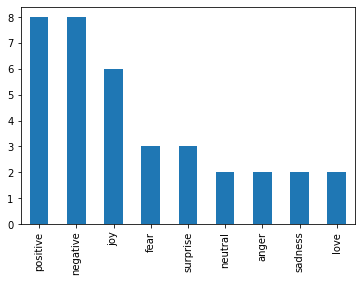

In [ ]:
fanfictions_sentiment_pd_df['sentiment'].value_counts().plot.bar()

In [ ]:
classics_sentiment_pd_df['sentiment'].value_counts().plot.bar()

### 5.4 Sentiment Visualization

In [ ]:
#pip install plotly==5.7.0
import plotly
from plotly.subplots import make_subplots

In [ ]:
#join classic and fanfic sentiment dataframes
sentiment_df = pd.concat([classics_sentiment_pd_df, fanfictions_sentiment_pd_df])

In [ ]:
sentiment_df

,corpus,sentiment,type
0,"THE GOVERNESS OR, THE LITTLE FEMALE ACADEMY (1...",joy,classic
1,Transcribed from the 1910 John Murray edition ...,joy,classic
2,PRIDE AND PREJUDICE By Jane Austen 1 It is a t...,joy,classic
3,Transcribed from the 1897 Service & Paton edit...,joy,classic
4,LITTLE WOMEN by Louisa May Alcott CONTENTS PAR...,joy,classic
...,...,...,...
4,"1 I was born in sunlight, and dragged into dar...",love,fanfiction
5,"1 Disclaimer: I, by no means, claim to own any...",sadness,fanfiction
6,1 There was something luminescent about Su...,fear,fanfiction
7,1 There was such a cultural veil of secrecy dr...,love,fanfiction


<AxesSubplot:>

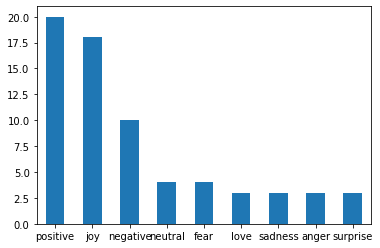

In [ ]:
sentiment_df['sentiment'].value_counts().plot.bar(x='type', rot=0)